🔍 Basic Profiling:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


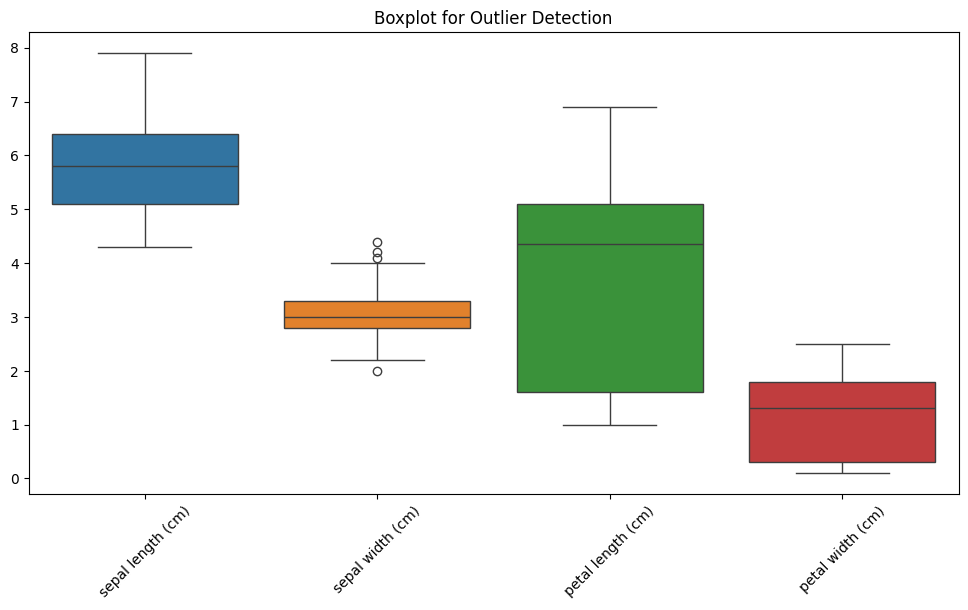


🚨 Outlier Detection (Z-Score > 3):

sepal length (cm)    0
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     0
dtype: int64


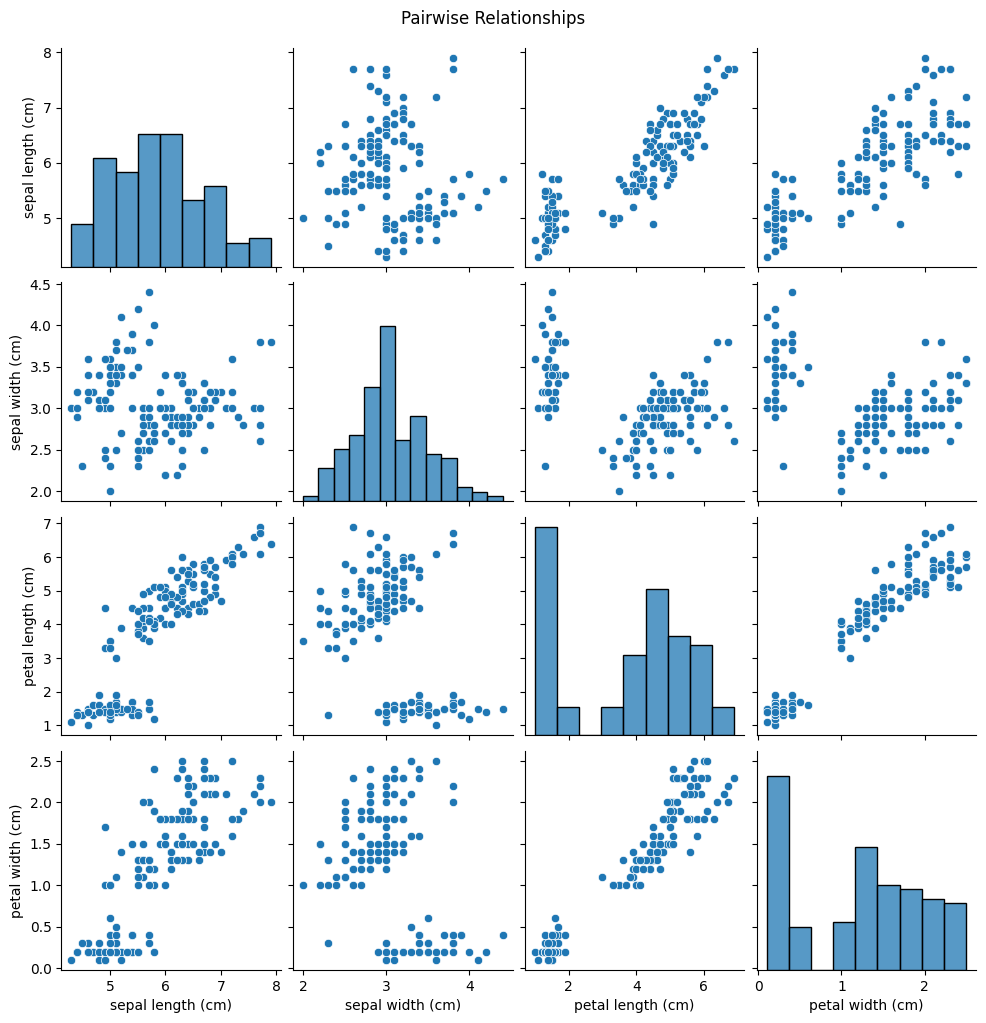

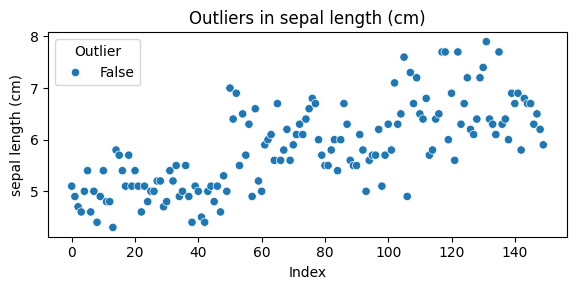

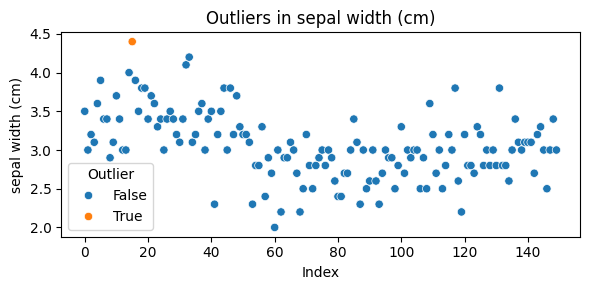

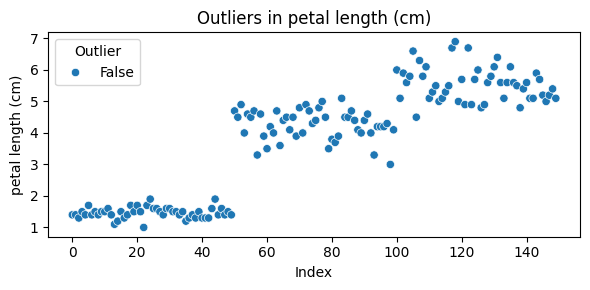

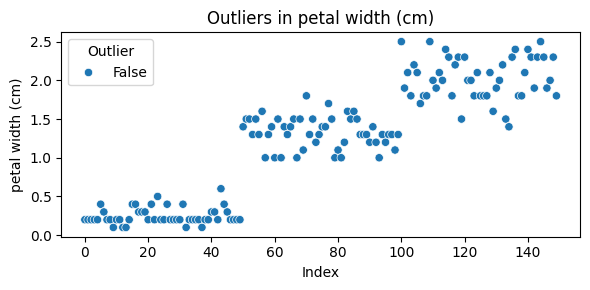

In [1]:
# Question: Advanced Data Profiling and Outlier Detection
# Description: Perform detailed data profiling including outlier detection for numeric columns.



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# ----------------------------
# Step 1: Basic Data Profiling
# ----------------------------
print("🔍 Basic Profiling:\n")
print(df.describe())

# ----------------------------
# Step 2: Boxplot for Outlier Detection
# ----------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# Step 3: Z-Score Based Outlier Detection
# ----------------------------
def detect_outliers_zscore(data, threshold=3):
    from scipy.stats import zscore
    z_scores = np.abs(zscore(data))
    outliers = (z_scores > threshold)
    return pd.DataFrame(outliers, columns=data.columns)

outlier_flags = detect_outliers_zscore(df)

print("\n🚨 Outlier Detection (Z-Score > 3):\n")
print(outlier_flags.sum())  # How many outliers in each column

# ----------------------------
# Step 4: Visualize with Pairplot
# ----------------------------
sns.pairplot(df)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# ----------------------------
# Step 5: Highlight Outliers on a Plot
# ----------------------------
for col in df.columns:
    plt.figure(figsize=(6, 3))
    sns.scatterplot(x=np.arange(len(df)), y=df[col], hue=outlier_flags[col])
    plt.title(f"Outliers in {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.legend(title='Outlier')
    plt.tight_layout()
    plt.show()


